In [2]:
import pandas as pd
import numpy as np
import sidetable
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats
from scipy.stats import kstest

import researchpy as rp
import scipy.stats as stats
from scipy.stats import levene

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('datos/coches_EDA.csv', index_col=0)
df.head()

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,num-of-cylinders,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,13495
1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,four,111.0,5000.0,21,27,16500
2,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,six,154.0,5000.0,19,26,16500
3,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,four,102.0,5500.0,24,30,13950
4,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,five,115.0,5500.0,18,22,17450


In [4]:
numericas = df.select_dtypes(include = np.number).drop("price", axis = 1)
numericas

,wheel-base,length,width,height,curb-weight,horsepower,peak-rpm,city-mpg,highway-mpg
0,88.6,168.8,64.1,48.8,2548,111.0,5000.0,21,27
1,88.6,168.8,64.1,48.8,2548,111.0,5000.0,21,27
2,94.5,171.2,65.5,52.4,2823,154.0,5000.0,19,26
3,99.8,176.6,66.2,54.3,2337,102.0,5500.0,24,30
4,99.4,176.6,66.4,54.3,2824,115.0,5500.0,18,22
...,...,...,...,...,...,...,...,...,...
197,109.1,188.8,68.8,55.5,3049,160.0,5300.0,19,25
198,109.1,188.8,68.9,55.5,3012,134.0,5500.0,18,23
199,109.1,188.8,68.9,55.5,3217,106.0,4800.0,26,27
200,109.1,188.8,68.9,55.5,3062,114.0,5400.0,19,25


In [5]:
numericas_col = df.select_dtypes(include = np.number).drop("price", axis = 1).columns

>El objetivo de este pairprgramming es que evaluéis si vuestro set de datos cumple todas las asunciones que se deben cumplir para hacer una regresión lineal. Recordamos que estas asunciones son:
>
>- Normalidad (ya la deberíais haber evaluado)
>- Homogeneidad de varianzas
>- Independencia de las variables
>  
>Cada asunción la deberéis testar de forma visual y analítica.


>## Normalidad (ya la deberíais haber evaluado)

In [6]:
numericas.skew() # No tenemos datos normales, ninguno es igual a 0, 
# todos son mayores, por lo tanto nuestras variables son asimétricas positivas.

wheel-base     1.010842
length         0.143794
width          0.857130
height         0.020291
curb-weight    0.692532
horsepower     1.150955
peak-rpm       0.095238
city-mpg       0.687371
highway-mpg    0.557602
dtype: float64

In [7]:
stats.shapiro(numericas) #En este caso, el p-valor es 0, por lo tanto, los datos indican que sí son normales.

ShapiroResult(statistic=0.5694931745529175, pvalue=0.0)

In [8]:
numericas.columns

Index(['wheel-base', 'length', 'width', 'height', 'curb-weight', 'horsepower',
       'peak-rpm', 'city-mpg', 'highway-mpg'],
      dtype='object')

In [9]:
columnas=numericas.columns

In [10]:
range(len(columnas))

range(0, 9)

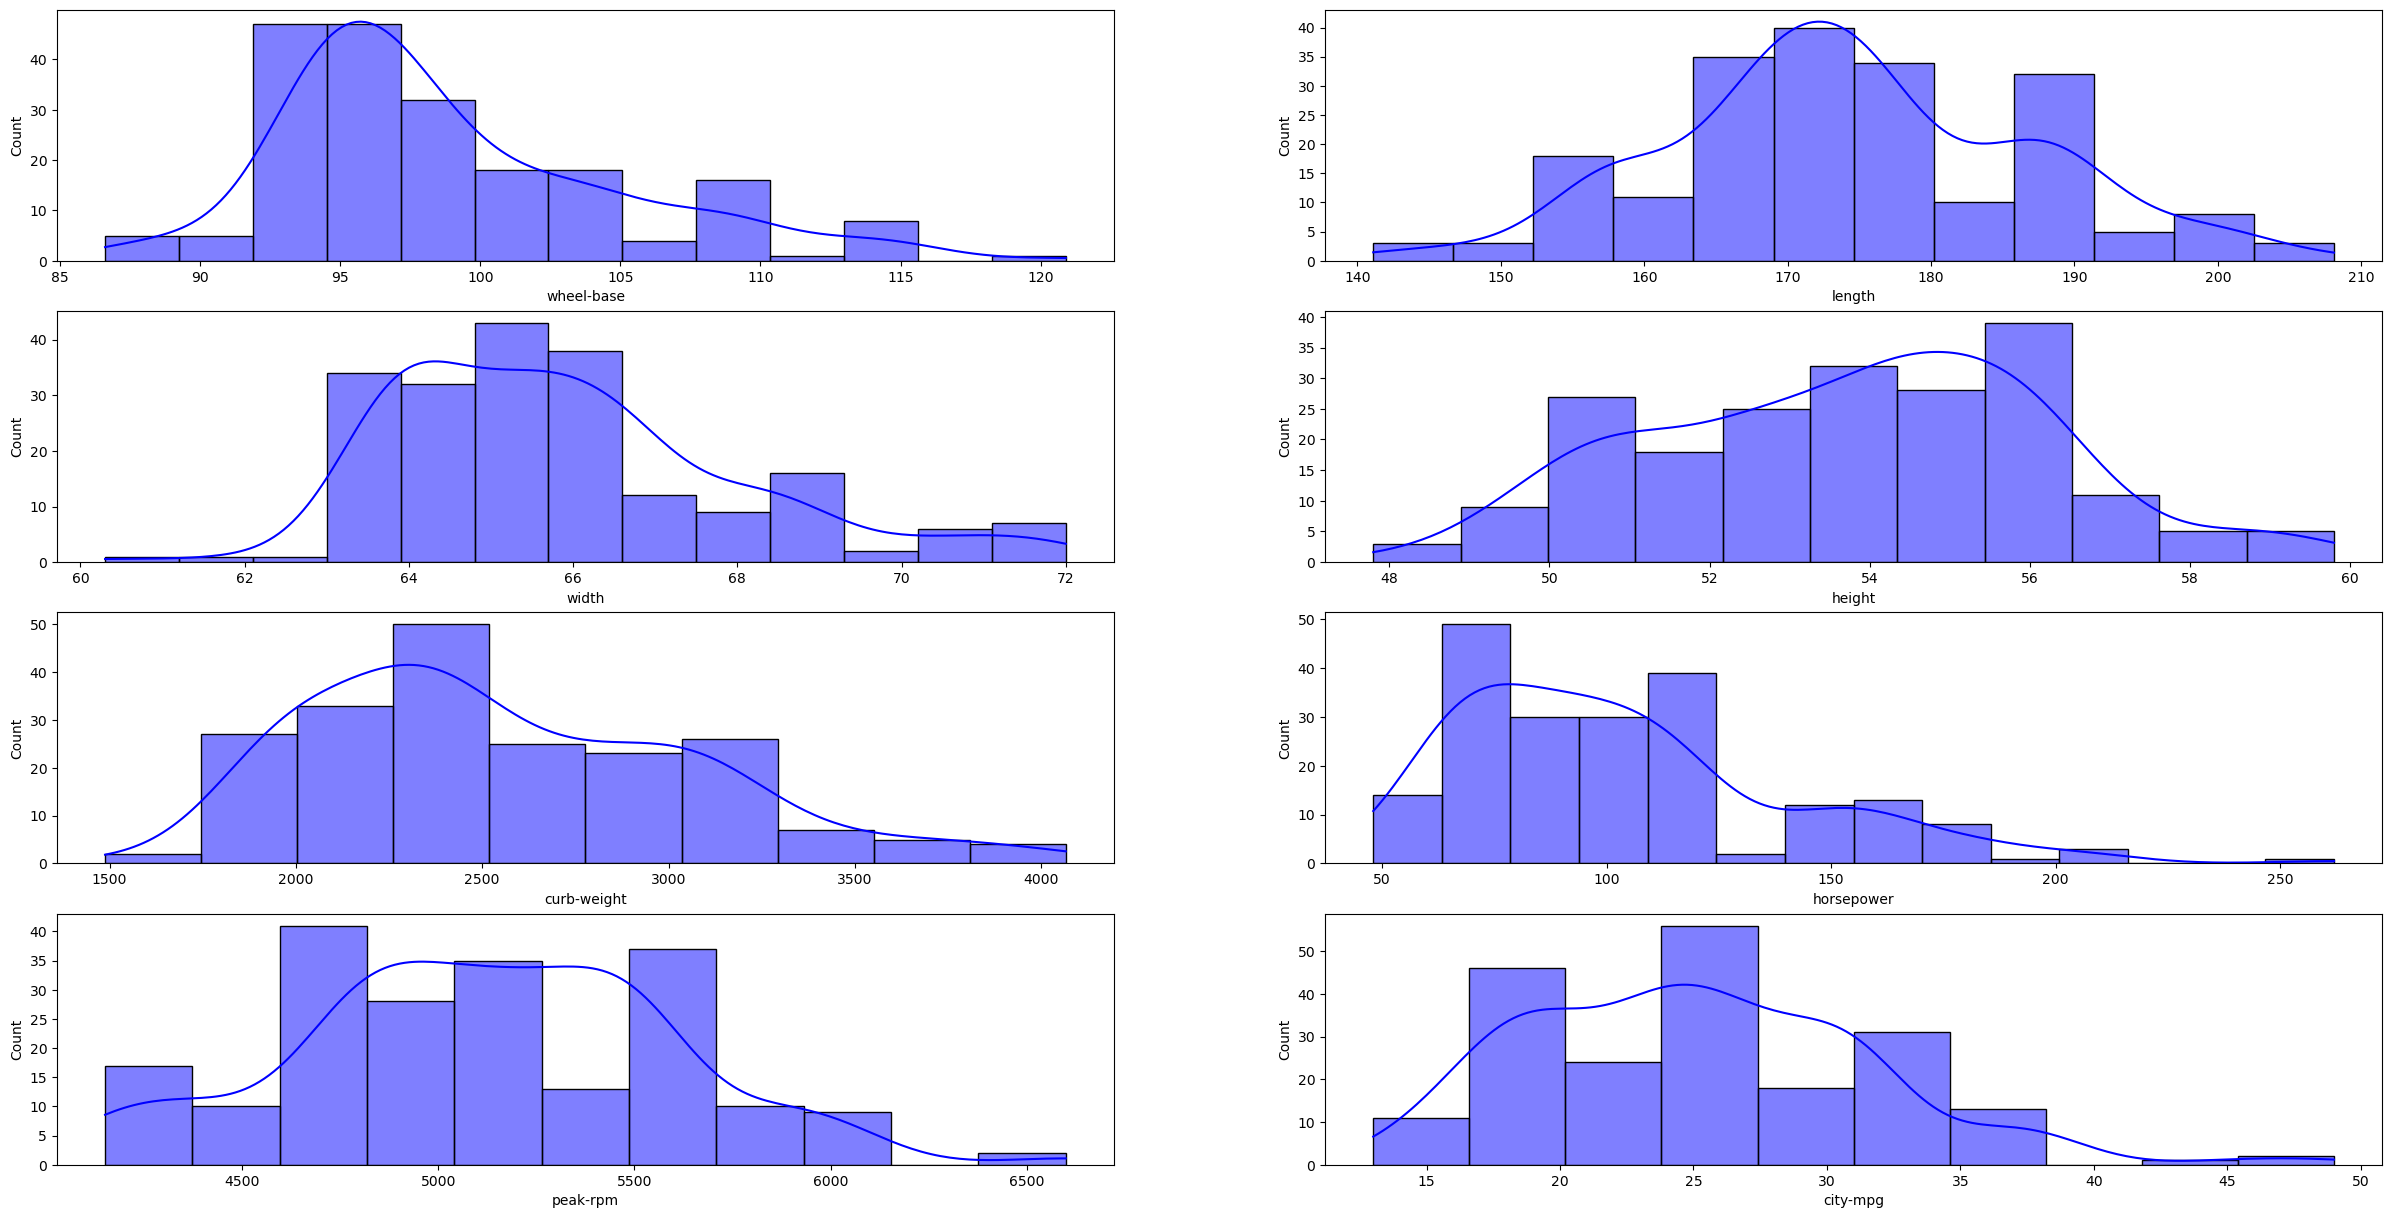

In [31]:
fig, axes = plt.subplots(nrows=4,ncols=2, figsize=(30,15))

axes=axes.flat

for i in range(len(columnas)-1):
    sns.histplot(numericas[columnas[i]], kde=True, color='blue', ax=axes[i])
    
plt.show();

- Tenemos algunas variables numéricas que sí muestran graficamente que los datos pueden ser normales, ya que su representación es similar a la camppana de Gauss, pero la mayoría están sesgados.

>## Homogeneidad de varianzas

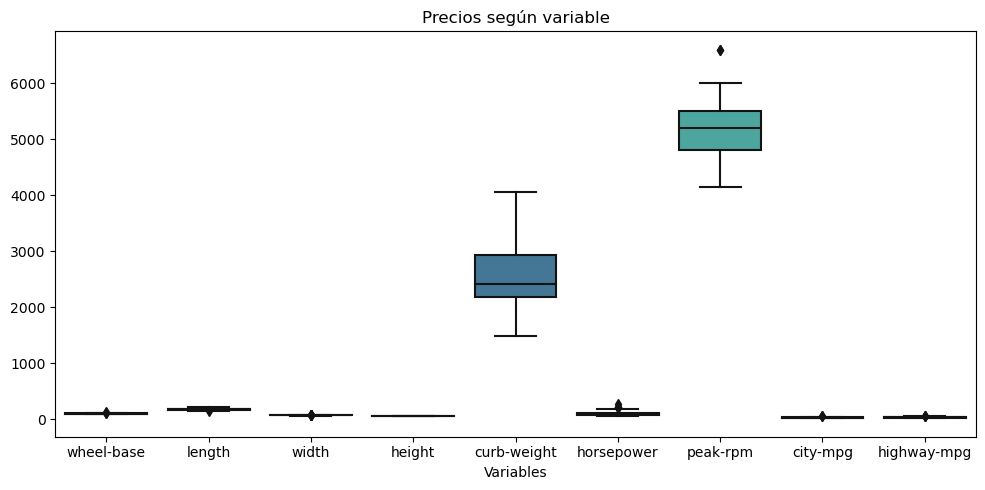

In [12]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

sns.boxplot(
    data    = numericas,
    palette = 'mako',
    ax = axes)
axes.set_title('Precios según variable')
axes.set_xlabel('Variables')
fig.tight_layout()
plt.show();

In [13]:
#Test de Levene para numéricas

numericas = df.select_dtypes(include = np.number)
numericas.head(2)

# creamos un diccionario para almacenar los resultados de los test
resultados = {}

# seleccionamos solo las columnas numéricas y eliminamos la columna de precio
numericas_col = df.select_dtypes(include = np.number).drop("price", axis = 1).columns

#iteremos por la lista de las columnas numéricas
for col in numericas_col:
    # calculamos el p-valor de test
    statistic, p_val = levene(df[col], df.price, center='median')
    # lo almacenamos en el diccionario
    resultados[col] = p_val

In [14]:
resultados

{'wheel-base': 9.989099925565232e-29,
 'length': 1.103065397260918e-28,
 'width': 9.441293620228944e-29,
 'height': 9.512466482241073e-29,
 'curb-weight': 2.977992279884529e-25,
 'horsepower': 1.5918983136380038e-28,
 'peak-rpm': 1.5589186727587746e-25,
 'city-mpg': 1.0104345176680232e-28,
 'highway-mpg': 1.0162354571302054e-28}

Rechazamos H0 porque el p-valor de estas variables es menor que 0,05, por lo tanto podemos decir que la distribución de los datos es homocedástica para las variables numéricas.

In [15]:
categoricas=df.select_dtypes(include='object')
categoricas.head(0)

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,num-of-cylinders


>Seleccionamos un par de variables para realizar el test de Levene en las categoricas

In [16]:
df['make'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'mercedes-benz', 'mercury',
       'mitsubishi', 'nissan', 'peugot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
df['fuel-type'].unique()

array(['gas', 'diesel'], dtype=object)

In [18]:
gas = df[df["fuel-type"] == 'gas']["price"]
fuel = df[df["fuel-type"] == 'diesel']["price"]

In [19]:
levene_test = stats.levene(gas, fuel, center='median')
levene_test

LeveneResult(statistic=0.321018009135255, pvalue=0.5716317665187819)

- El p-valor para la variable 'fuel-type' es > a 0,05, por lo los datos de esta variable son homocedásticos.

In [20]:
df['aspiration'].unique()

array(['std', 'turbo'], dtype=object)

In [21]:
std = df[df["aspiration"] == 'std']["price"]
turbo = df[df["aspiration"] == 'turbo']["price"]

In [22]:
levene_test = stats.levene(gas, fuel, center='median')
levene_test

LeveneResult(statistic=0.321018009135255, pvalue=0.5716317665187819)

- El p-valor para la variable 'aspiration' es > a 0,05, por lo los datos de esta variable son homocedásticos.

In [23]:
df['num-of-doors'].unique()

array(['two', 'four', nan], dtype=object)

In [24]:
df['body-style'].unique()		

array(['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
      dtype=object)

In [25]:
df['drive-wheels'].unique()	

array(['rwd', 'fwd', '4wd'], dtype=object)

In [26]:
df['engine-location'].unique()

array(['front', 'rear'], dtype=object)

In [27]:
df['num-of-cylinders'].unique()			

array(['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
      dtype=object)

>## Independencia de las variables

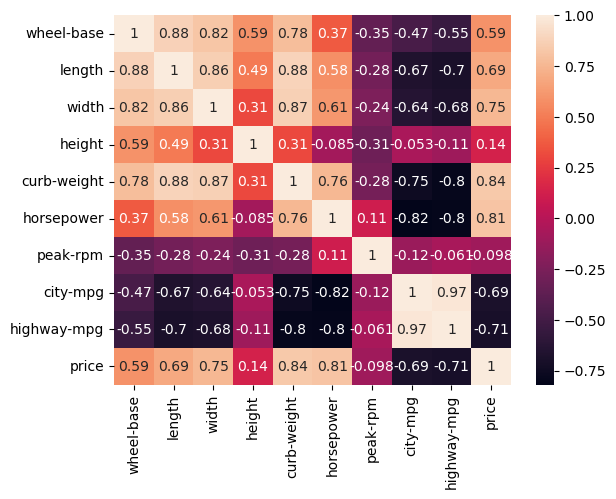

In [29]:
sns.heatmap(numericas.corr(), annot=True)
plt.show()

Sí se observan variables muy correlacionadas, las que vemos por encima del 0,7/-0,7.

La varibale respuesta, que es la que más nos interesa, tiene correlación positiva con las variables:

- wheel-base
- lenght
- widht
- curb-weight
- horsepower

Tiene correlación negativa con las variables:

- city-mpg
- highway-mpg

>Tests Chi_square por columnas numéricas para calcular el p-valor para su independencia.

In [30]:
for i in numericas_col:
    crosstab, test_results, expected = rp.crosstab(numericas[i], df["price"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")
    print(f'Para la columna {i} los resultados son:')
    print(test_results)
    print('------------------')

Para la columna wheel-base los resultados son:
                   Chi-square test     results
0  Pearson Chi-square ( 9435.0) =   10033.0021
1                       p-value =       0.0000
2                    Cramer's V =       0.9869
------------------
Para la columna length los resultados son:
                    Chi-square test     results
0  Pearson Chi-square ( 13320.0) =   13728.7857
1                        p-value =       0.0065
2                     Cramer's V =       0.9716
------------------
Para la columna width los resultados son:
                   Chi-square test    results
0  Pearson Chi-square ( 7770.0) =   8244.5781
1                       p-value =      0.0001
2                    Cramer's V =      0.9858
------------------
Para la columna height los resultados son:
                   Chi-square test    results
0  Pearson Chi-square ( 8880.0) =   9121.7429
1                       p-value =      0.0357
2                    Cramer's V =      0.9699
------------------
P

- La mayoría de las variables numéricas son independientes, ya que su p-valor es menor a 0,05.